### Importing the necessary Python libraries and dataset

In [41]:
import pandas as pd
health_data = pd.read_csv('healthmonitoring.csv')
print(health_data.head())

   PatientID  Age  Gender  HeartRate BloodPressure  RespiratoryRate  \
0          1   69    Male  60.993428        130/85               15   
1          2   32    Male  98.723471        120/80               23   
2          3   78  Female  82.295377        130/85               13   
3          4   38  Female  80.000000        111/78               19   
4          5   41    Male  87.531693        120/80               14   

   BodyTemperature ActivityLevel  OxygenSaturation SleepQuality StressLevel  \
0        98.885236       resting              95.0    excellent         low   
1        98.281883       walking              97.0         good        high   
2        98.820286       resting              98.0         fair        high   
3        98.412594       running              98.0         poor    moderate   
4        99.369871       resting              98.0         good         low   

                    Timestamp  
0  2024-04-26 17:28:55.286711  
1  2024-04-26 17:23:55.286722  
2 

### Check whether the data conatins any null values

In [42]:
health_data.isnull().sum()

PatientID             0
Age                   0
Gender                0
HeartRate             0
BloodPressure         0
RespiratoryRate       0
BodyTemperature      18
ActivityLevel         0
OxygenSaturation    163
SleepQuality          0
StressLevel           0
Timestamp             0
dtype: int64

The data contains null values in body temperature and oxygen saturation columns. To simply handle this, I will:

### Fill the Null Values using Median Values

In [43]:
# calculating medians
median_body_temp = health_data['BodyTemperature'].median()
median_oxygen_sat = health_data['OxygenSaturation'].median()

# filling missing values
health_data['BodyTemperature'].fillna(median_body_temp, inplace=True)
health_data['OxygenSaturation'].fillna(median_oxygen_sat, inplace=True)

Next, I will analyze the summary statistics and the distribution of key numerical health metrics, including Age, Heart Rate, Respiratory Rate, Body Temperature, and Oxygen Saturation. This analysis will provide insight into typical values, the range, and the variability within the data. Additionally, I will include visualizations to enhance the understanding of these distributions, offering a clearer picture of the overall data trends and any potential outliers.

### Summary Statistics and Distribution of Key Numerical Metrics

StopIteration: 

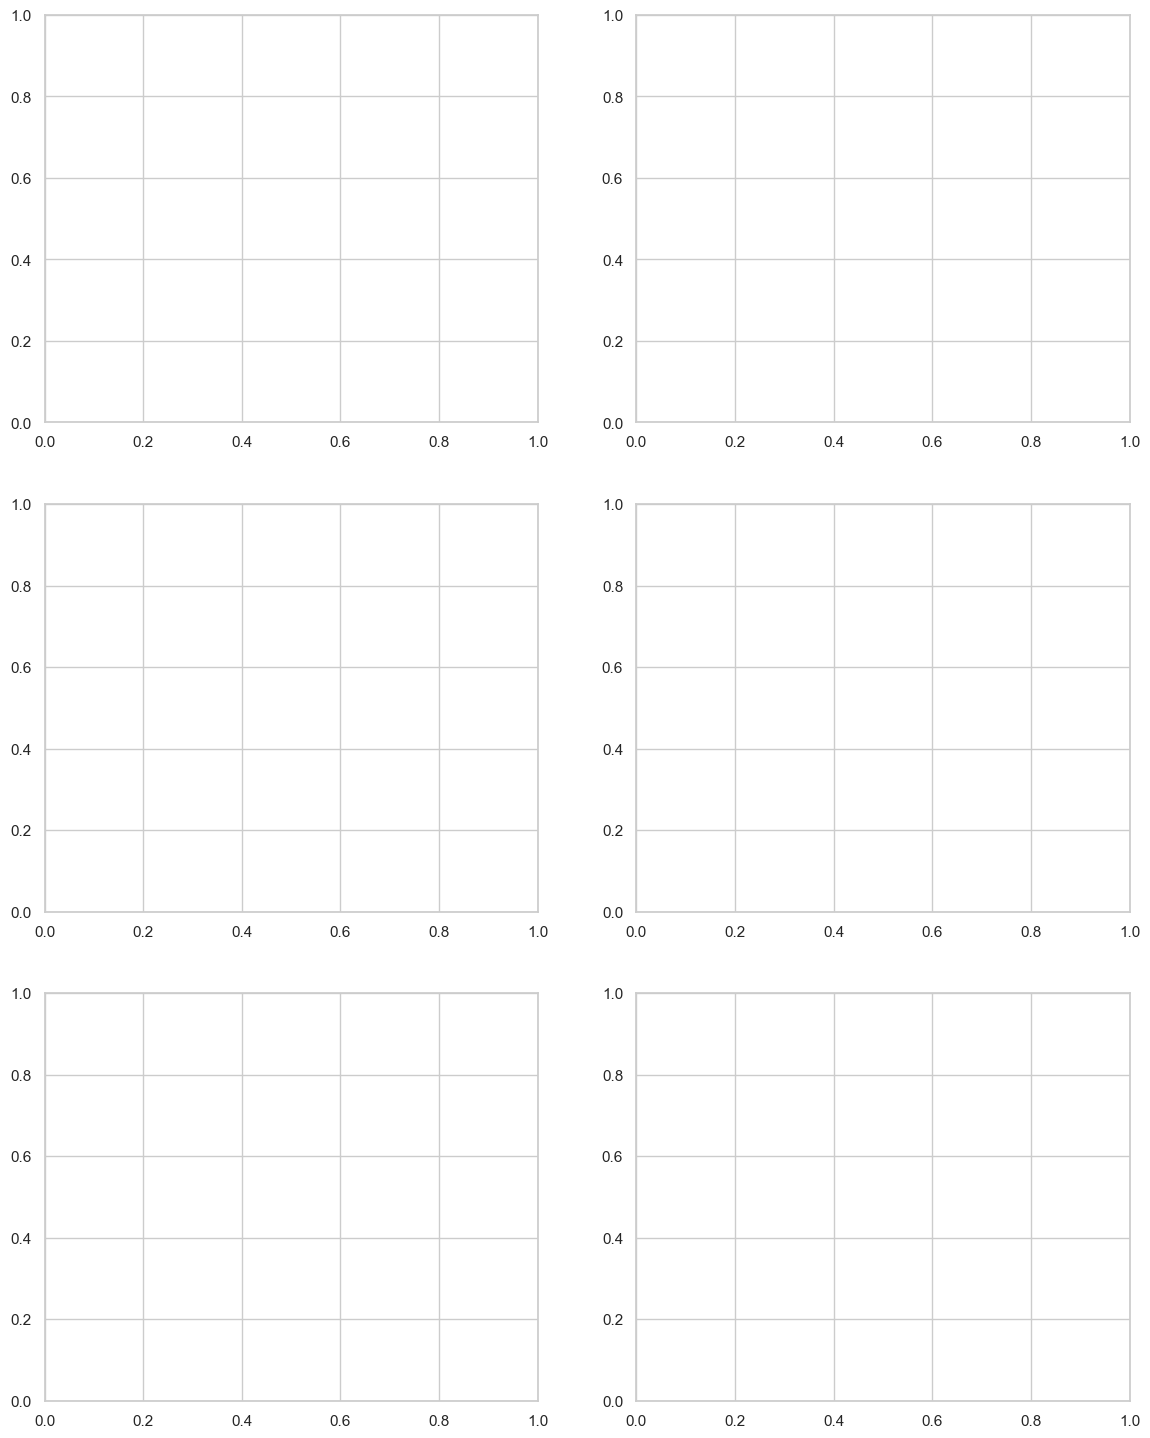

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style="whitegrid")

# summary statistics
summary_stats = health_data.describe()

# plotting distributions of numerical features
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
sns.histplot(np.array(health_data['Age']), bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

sns.histplot(health_data['HeartRate'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Heart Rate Distribution')

sns.histplot(health_data['RespiratoryRate'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Respiratory Rate Distribution')

sns.histplot(health_data['BodyTemperature'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Body Temperature Distribution')

sns.histplot(health_data['OxygenSaturation'], bins=10, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Oxygen Saturation Distribution')

fig.delaxes(axes[2,1])  # remove unused subplot

plt.tight_layout()
plt.show()

In [ ]:
print(summary_stats)

        PatientID         Age   HeartRate  RespiratoryRate  BodyTemperature  \
count  500.000000  500.000000  500.000000       500.000000       500.000000   
mean   250.500000   51.146000   80.131613        17.524000        98.584383   
std    144.481833   19.821566    9.606273         3.382352         0.461502   
min      1.000000   18.000000   60.169259        12.000000        97.094895   
25%    125.750000   34.000000   75.000000        15.000000        98.281793   
50%    250.500000   51.000000   80.000000        17.500000        98.609167   
75%    375.250000   69.000000   86.276413        20.000000        98.930497   
max    500.000000   84.000000   99.925508        23.000000        99.489150   

       OxygenSaturation  
count        500.000000  
mean          96.296000  
std            1.408671  
min           94.000000  
25%           96.000000  
50%           96.000000  
75%           97.000000  
max           99.000000  


### Gender Distibution and Correlation between Numerical Columns in the Dataset

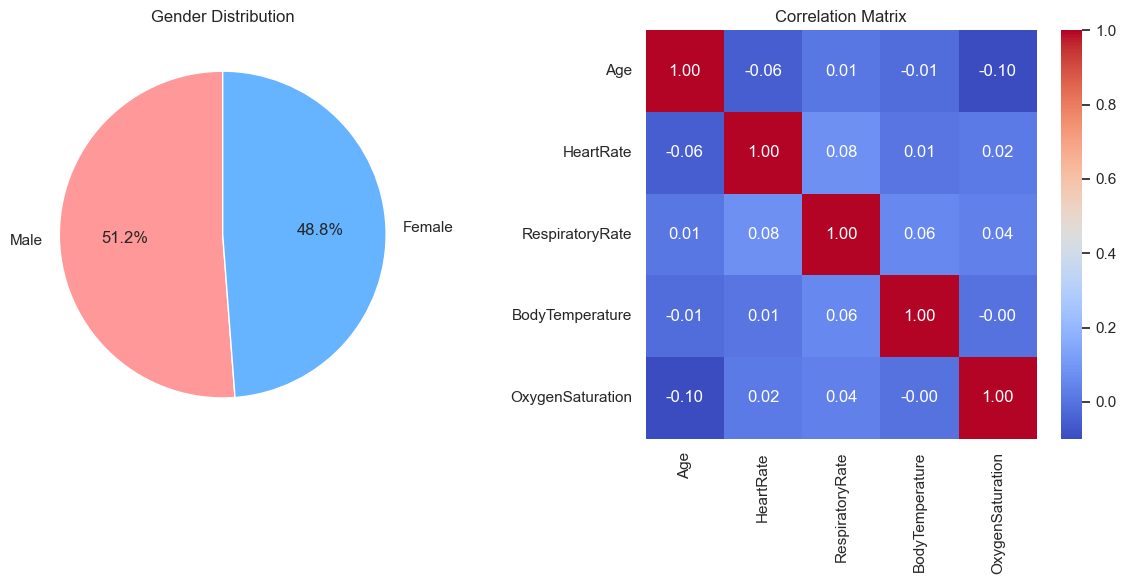

In [ ]:
# gender Distribution
gender_counts = health_data['Gender'].value_counts()

# correlation Matrix for numerical health metrics
correlation_matrix = health_data[['Age', 'HeartRate', 'RespiratoryRate', 'BodyTemperature', 'OxygenSaturation']].corr()

# plotting the findings
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# gender distribution plot
gender_counts.plot(kind='pie', ax=axes[0], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
axes[0].set_ylabel('')
axes[0].set_title('Gender Distribution')

# correlation matrix plot
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()


The pie chart reveals an almost equal distribution of male and female participants in the dataset, with males making up a slight majority at 51.2%. The correlation matrix indicates weak correlations between the variables, as the values are all close to zero. Specifically, none of the health metrics: Age, Heart Rate, Respiratory Rate, Body Temperature, and Oxygen Saturation—show a strong positive or negative linear relationship with each other in this dataset. This suggests that, for this group, changes in one metric are not closely linked to changes in the others.

### Heart Rate by Activity Level

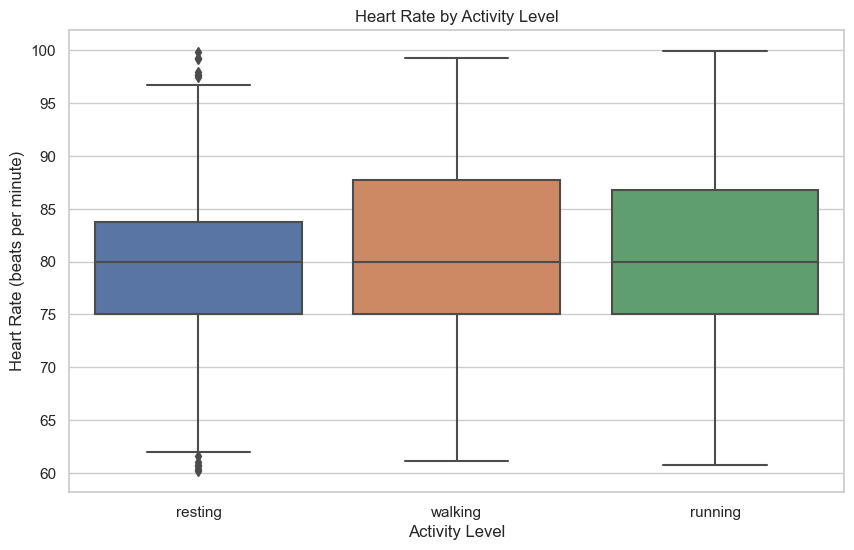

In [ ]:
# heart Rate by activity level
plt.figure(figsize=(10, 6))
sns.boxplot(x='ActivityLevel', y='HeartRate', data=health_data)
plt.title('Heart Rate by Activity Level')
plt.ylabel('Heart Rate (beats per minute)')
plt.xlabel('Activity Level')
plt.show()

The data indicates that the median heart rate rises from rest to walking, which aligns with the anticipated response to increased physical activity. However, contrary to expectations, the median heart rate does not show a substantial further increase when transitioning from walking to running, a more demanding activity. Additionally, there is notable overlap in the interquartile ranges between walking and running, indicating comparable variability in heart rates across these activities within the sampled population. The presence of outliers in the resting heart rate category suggests that certain individuals exhibit resting heart rates significantly higher than the typical range observed in the group.

### Distribution of Blood Pressure Levels and other Health Metrics by Gender

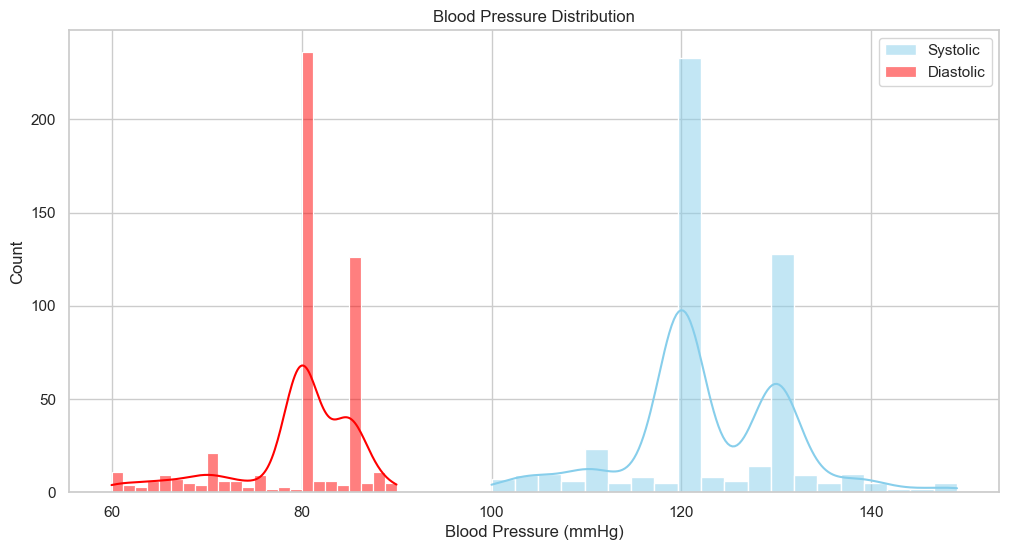

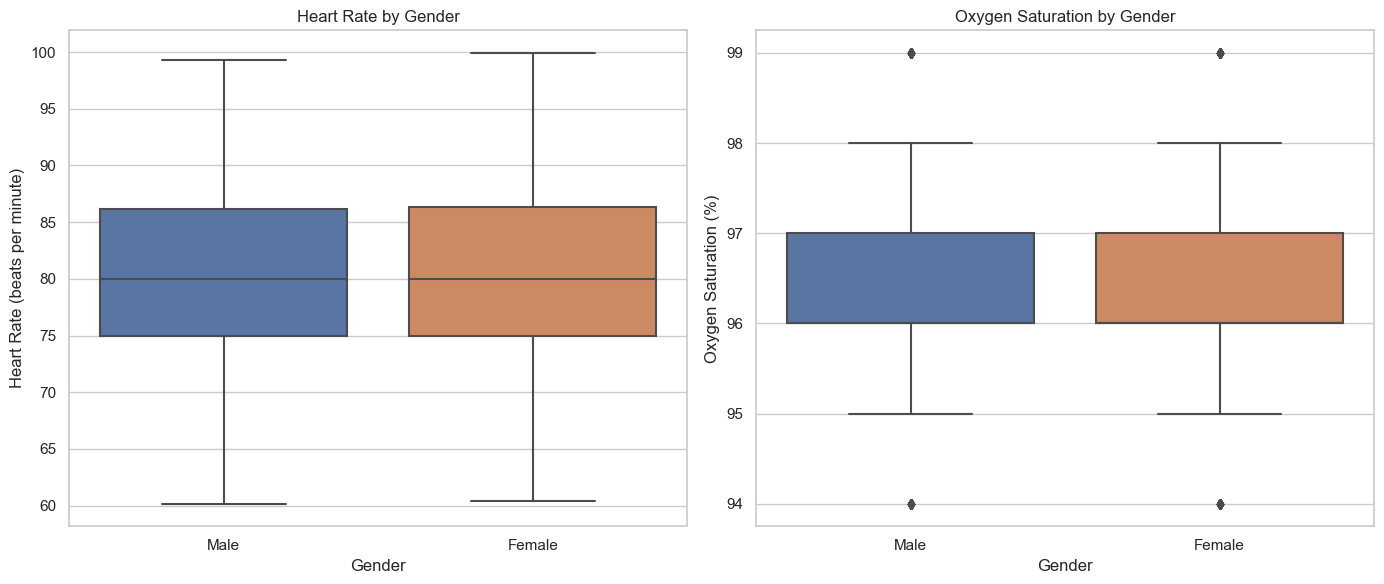

In [ ]:
# extracting systolic and diastolic blood pressure for analysis
health_data[['SystolicBP', 'DiastolicBP']] = health_data['BloodPressure'].str.split('/', expand=True).astype(int)

# blood pressure distribution
plt.figure(figsize=(12, 6))
sns.histplot(health_data['SystolicBP'], color="skyblue", label="Systolic", kde=True)
sns.histplot(health_data['DiastolicBP'], color="red", label="Diastolic", kde=True)
plt.title('Blood Pressure Distribution')
plt.xlabel('Blood Pressure (mmHg)')
plt.legend()
plt.show()

# health metrics by gender
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(x='Gender', y='HeartRate', data=health_data, ax=axes[0])
axes[0].set_title('Heart Rate by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Heart Rate (beats per minute)')

sns.boxplot(x='Gender', y='OxygenSaturation', data=health_data, ax=axes[1])
axes[1].set_title('Oxygen Saturation by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Oxygen Saturation (%)')

plt.tight_layout()
plt.show()

The distribution of systolic blood pressure, depicted in blue, displays a broader range, with notable peaks around 120 mmHg and 140 mmHg, suggesting these are common values. In contrast, diastolic blood pressure, shown in red, has a narrower distribution, with a pronounced peak near 80 mmHg. This pattern is expected, as systolic pressure typically shows greater variability due to influences such as physical activity and stress. These findings align with general population trends, where a systolic pressure of approximately 120 mmHg and a diastolic pressure of around 80 mmHg are considered normal.
Regarding heart rate, both males and females demonstrate similar median values and comparable interquartile ranges, indicating no significant gender-based difference in heart rate within this dataset. Similarly, oxygen saturation levels exhibit nearly identical medians and interquartile ranges for both genders, suggesting minimal variation between males and females. While there are a few outliers with lower-than-typical oxygen saturation values in both groups, these do not substantially impact the overall distribution.

### Heart Rate and Oxygen Saturation by Sleep Quality and Stress Levels

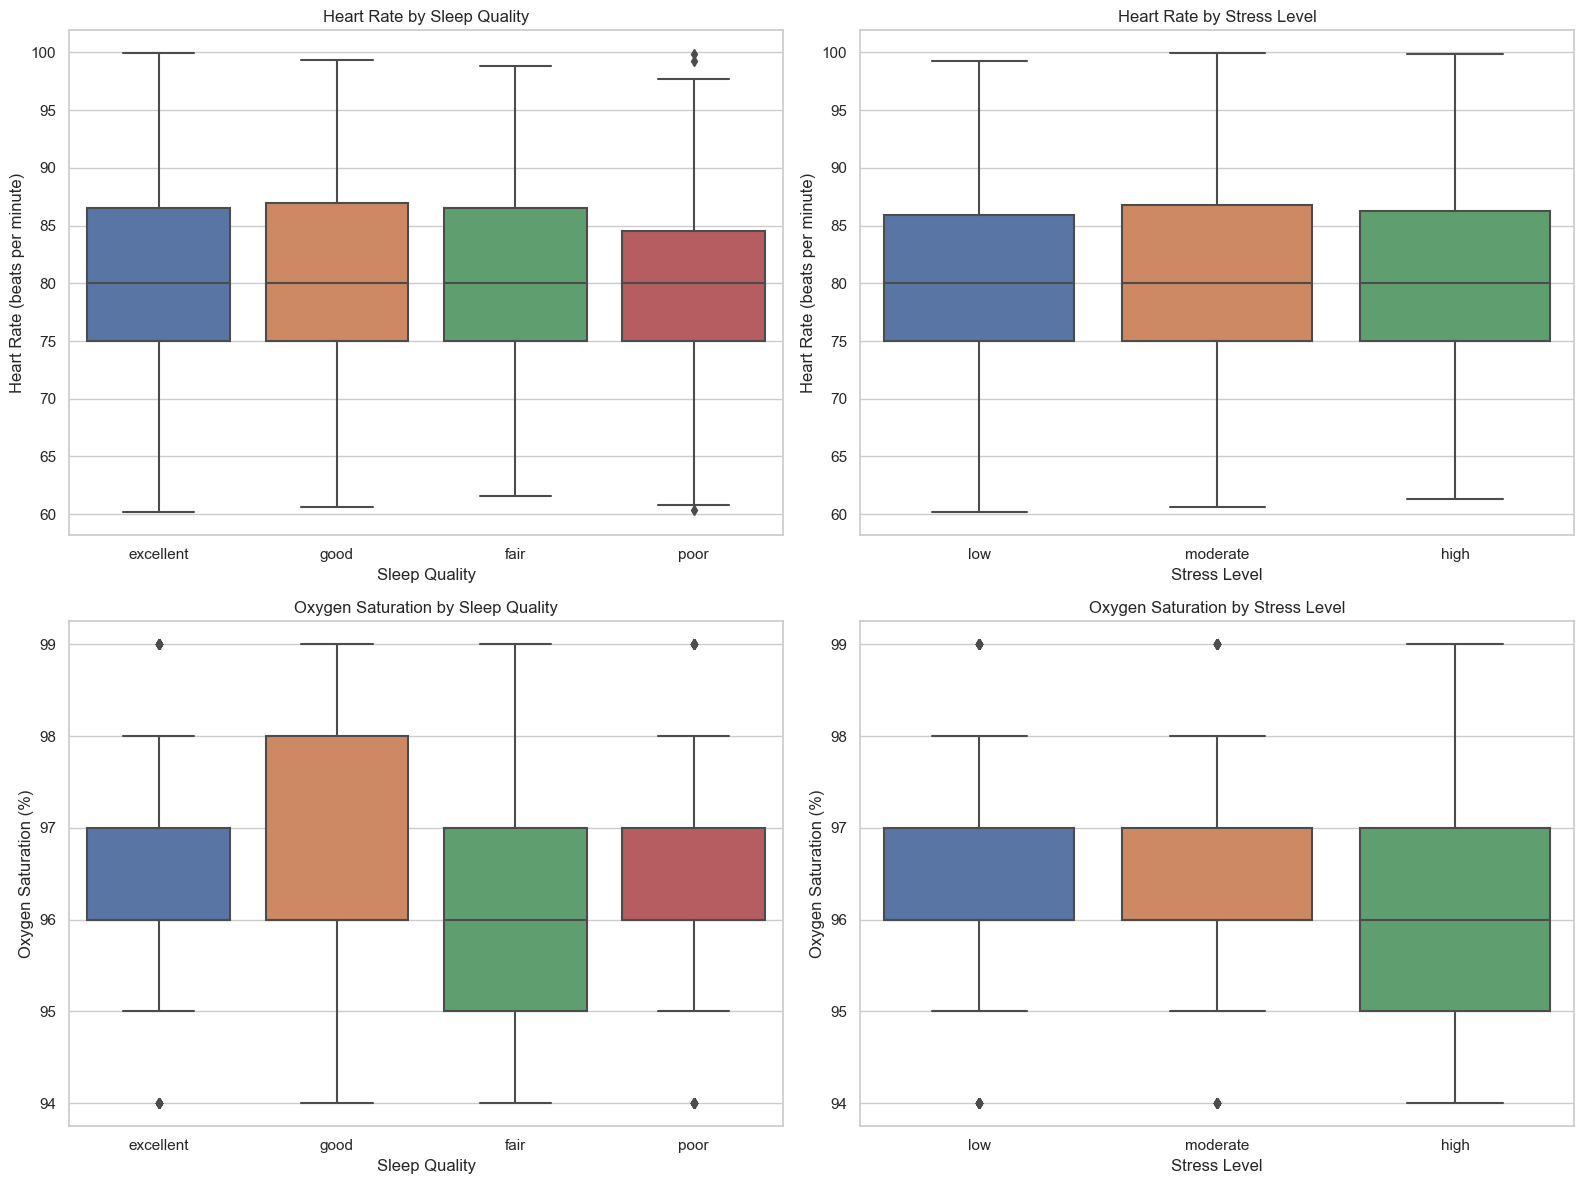

In [ ]:
# categorizing sleep quality and stress level for better analysis
sleep_quality_order = ['excellent', 'good', 'fair', 'poor']
stress_level_order = ['low', 'moderate', 'high']

# creating plots to examine relationships
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# heart rate by sleep quality
sns.boxplot(x='SleepQuality', y='HeartRate', data=health_data, order=sleep_quality_order, ax=axes[0, 0])
axes[0, 0].set_title('Heart Rate by Sleep Quality')
axes[0, 0].set_xlabel('Sleep Quality')
axes[0, 0].set_ylabel('Heart Rate (beats per minute)')

# heart rate by stress level
sns.boxplot(x='StressLevel', y='HeartRate', data=health_data, order=stress_level_order, ax=axes[0, 1])
axes[0, 1].set_title('Heart Rate by Stress Level')
axes[0, 1].set_xlabel('Stress Level')
axes[0, 1].set_ylabel('Heart Rate (beats per minute)')

# oxygen saturation by sleep quality
sns.boxplot(x='SleepQuality', y='OxygenSaturation', data=health_data, order=sleep_quality_order, ax=axes[1, 0])
axes[1, 0].set_title('Oxygen Saturation by Sleep Quality')
axes[1, 0].set_xlabel('Sleep Quality')
axes[1, 0].set_ylabel('Oxygen Saturation (%)')

# oxygen saturation by stress level
sns.boxplot(x='StressLevel', y='OxygenSaturation', data=health_data, order=stress_level_order, ax=axes[1, 1])
axes[1, 1].set_title('Oxygen Saturation by Stress Level')
axes[1, 1].set_xlabel('Stress Level')
axes[1, 1].set_ylabel('Oxygen Saturation (%)')

plt.tight_layout()
plt.show()

Heart rate remains relatively stable across varying levels of sleep quality and stress, with only a slight increase in variability among individuals reporting poor sleep quality. Oxygen saturation shows a modest decrease in median values as sleep quality declines from excellent to poor, with some outliers displaying lower saturation levels even among those with excellent or good sleep. When analyzed in relation to stress levels, oxygen saturation remains largely unaffected. Overall, despite the presence of some outliers, the central trends suggest that neither heart rate nor oxygen saturation is significantly influenced by sleep quality or stress levels in this dataset.

### Respiratory Rate and Body Temperature by Activity Levels

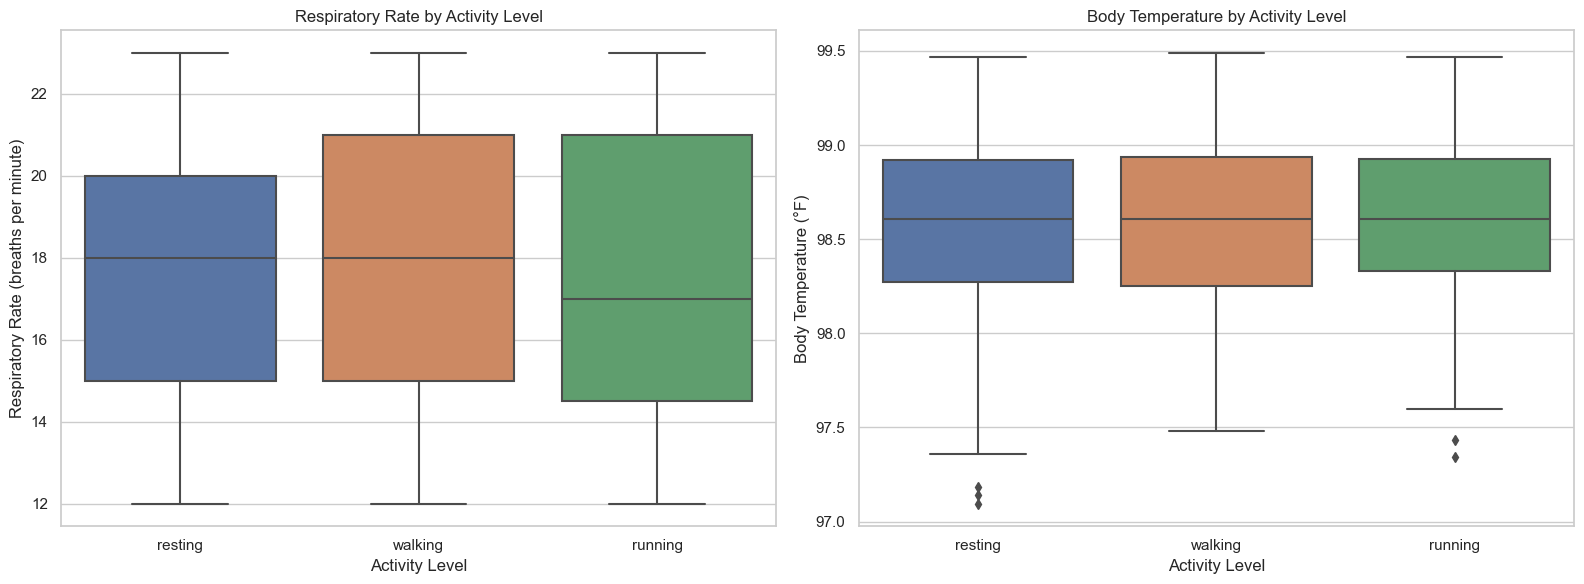

In [ ]:
# creating plots to examine relationships between activity level and other health metrics
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# respiratory rate by activity level
sns.boxplot(x='ActivityLevel', y='RespiratoryRate', data=health_data, ax=axes[0])
axes[0].set_title('Respiratory Rate by Activity Level')
axes[0].set_xlabel('Activity Level')
axes[0].set_ylabel('Respiratory Rate (breaths per minute)')

# body temperature by activity level
sns.boxplot(x='ActivityLevel', y='BodyTemperature', data=health_data, ax=axes[1])
axes[1].set_title('Body Temperature by Activity Level')
axes[1].set_xlabel('Activity Level')
axes[1].set_ylabel('Body Temperature (°F)')

plt.tight_layout()
plt.show()

Respiratory rate generally increases with rising activity levels, as reflected by higher median rates during walking and running compared to resting. This pattern corresponds with the body's physiological response to exercise, where an increased breathing rate is necessary to meet greater oxygen demands. Similarly, body temperature shows a slight upward trend from rest to running, consistent with the body heating up during physical exertion. There are outliers in body temperature at both the resting and running stages, indicating that some individuals have temperatures outside the typical range for these activity levels. Overall, these trends align with expected physiological responses to varying degrees of activity.

### Grouping Patients

The dataset is straightforward hence a clustering algorithm is unnecessary. Instead, we can classify patients into distinct groups using the following categories:

    - Age Group: Young, Middle-aged, Senior
    - Blood Pressure Category: Normal, Elevated, Hypertension Stage 1, Hypertension Stage 2
    - Heart Rate Category: Low, Normal, High
    - Oxygen Saturation Category: Normal, Low
    
By organizing the data within these predefined categories, patients can be effectively grouped based on relevant health metrics without the need for advanced clustering techniques.

In [ ]:
# function to categorize Age
def age_group(age):
    if age <= 35:
        return 'Young'
    elif age <= 55:
        return 'Middle-aged'
    else:
        return 'Senior'

# function to categorize Blood Pressure
def bp_category(systolic, diastolic):
    if systolic < 120 and diastolic < 80:
        return 'Normal'
    elif 120 <= systolic < 140 or 80 <= diastolic < 90:
        return 'Elevated'
    elif 140 <= systolic < 160 or 90 <= diastolic < 100:
        return 'Hypertension Stage 1'
    else:
        return 'Hypertension Stage 2'

# function to categorize Heart Rate
def hr_category(hr):
    if hr < 60:
        return 'Low'
    elif hr <= 100:
        return 'Normal'
    else:
        return 'High'

# function to categorize Oxygen Saturation
def oxy_category(oxy):
    if oxy < 94:
        return 'Low'
    else:
        return 'Normal'

# applying categorizations
health_data['AgeGroup'] = health_data['Age'].apply(age_group)
health_data['BPCategory'] = health_data.apply(lambda x: bp_category(x['SystolicBP'], x['DiastolicBP']), axis=1)
health_data['HRCategory'] = health_data['HeartRate'].apply(hr_category)
health_data['OxyCategory'] = health_data['OxygenSaturation'].apply(oxy_category)

print(health_data[['Age', 'AgeGroup', 'SystolicBP', 'DiastolicBP', 'BPCategory', 'HeartRate', 'HRCategory', 'OxygenSaturation', 'OxyCategory']].head())

   Age     AgeGroup  SystolicBP  DiastolicBP BPCategory  HeartRate HRCategory  \
0   69       Senior         130           85   Elevated  60.993428     Normal   
1   32        Young         120           80   Elevated  98.723471     Normal   
2   78       Senior         130           85   Elevated  82.295377     Normal   
3   38  Middle-aged         111           78     Normal  80.000000     Normal   
4   41  Middle-aged         120           80   Elevated  87.531693     Normal   

   OxygenSaturation OxyCategory  
0              95.0      Normal  
1              97.0      Normal  
2              98.0      Normal  
3              98.0      Normal  
4              98.0      Normal  


### Visualizing the Groups

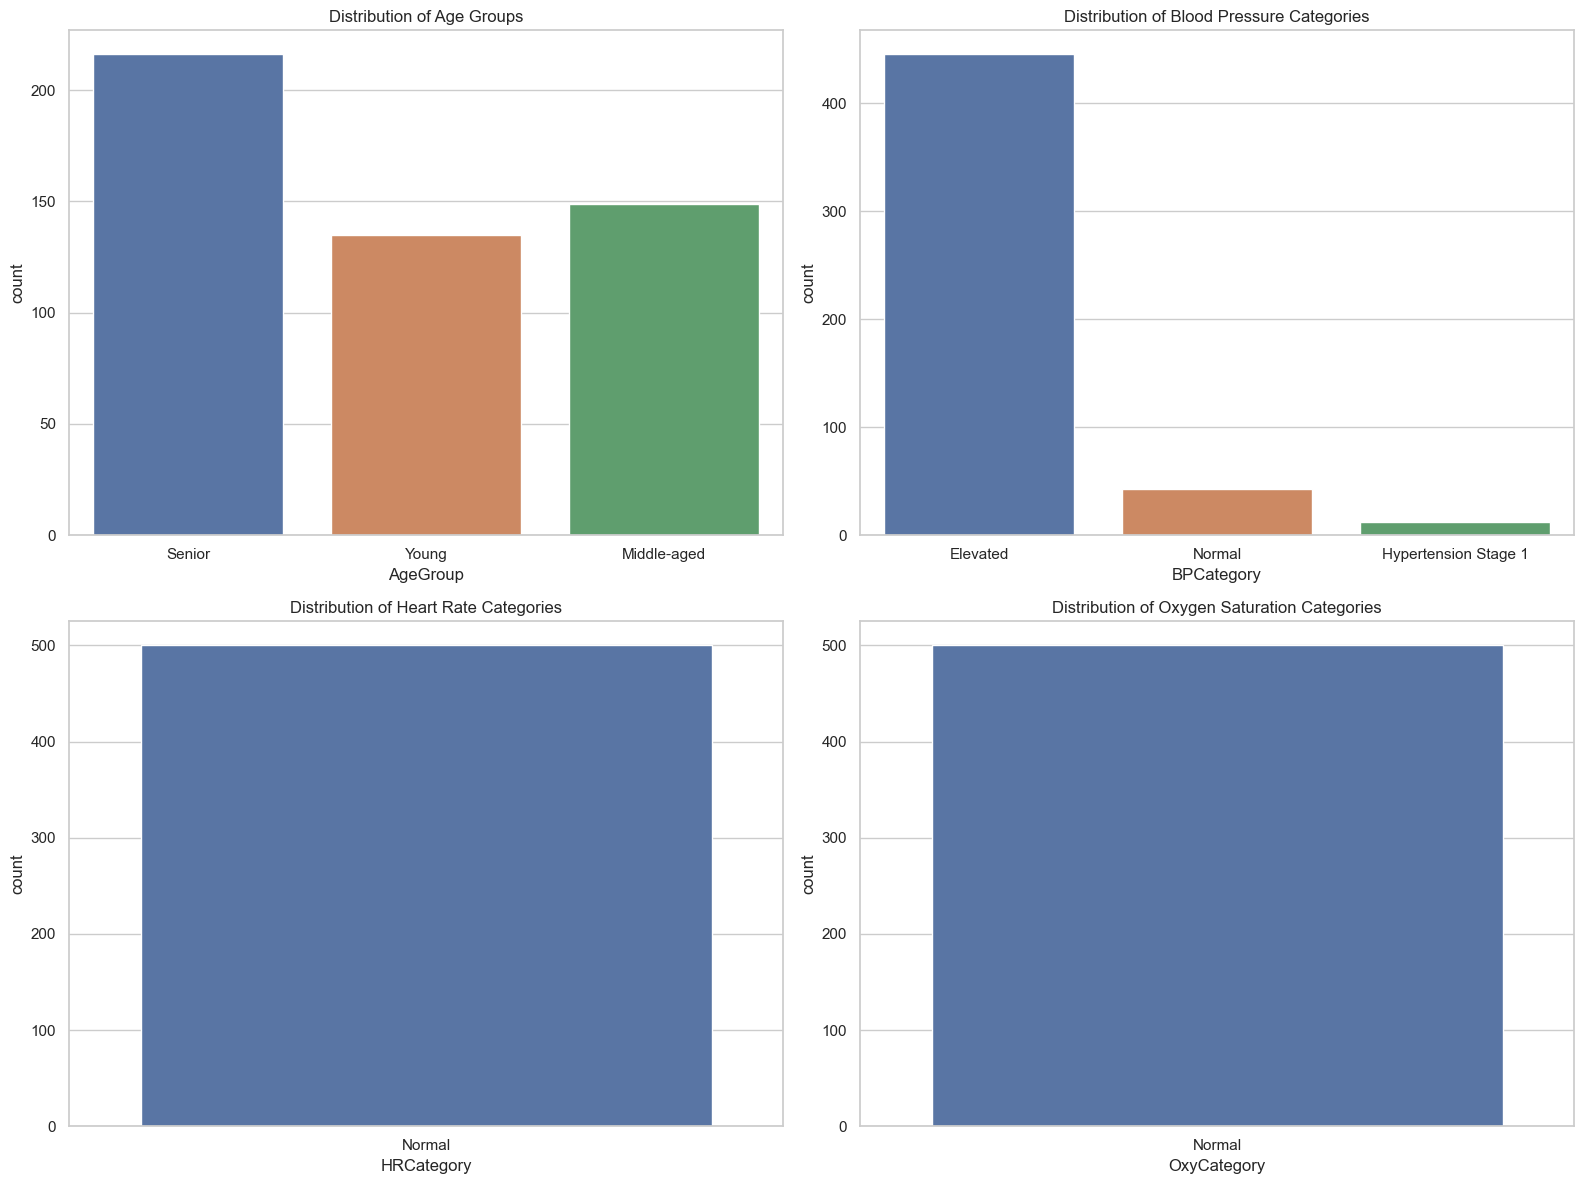

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Age Group count plot
sns.countplot(x='AgeGroup', data=health_data, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age Groups')

# Blood Pressure Category count plot
sns.countplot(x='BPCategory', data=health_data, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Blood Pressure Categories')

# Heart Rate Category count plot
sns.countplot(x='HRCategory', data=health_data, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Heart Rate Categories')

# Oxygen Saturation Category count plot
sns.countplot(x='OxyCategory', data=health_data, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Oxygen Saturation Categories')

# Show the plots
plt.tight_layout()
plt.show()

### Observation:
#### Distribution of Age Groups:
The count plot reveals that the ‘Senior’ category has the highest representation, followed by the ‘Young’ and ‘Middle-aged’ groups. This suggests that seniors make up the largest portion of the dataset.
#### Distribution of Blood Pressure Categories:
A significant portion of the dataset falls under the ‘Normal’ blood pressure category, with fewer individuals classified as ‘Elevated’ or ‘Hypertension Stage 1’. The ‘Hypertension Stage 2’ group has the lowest count, indicating that severe hypertension is relatively uncommon in this population.
#### Distribution of Heart Rate Categories: 
Most individuals exhibit a ‘Normal’ heart rate, with only a small number categorized as having ‘Low’ or ‘High’ heart rates. This suggests that the majority of participants have heart rates within the typical range.
#### Distribution of Oxygen Saturation Categories: 
Nearly all participants have ‘Normal’ oxygen saturation levels, with only a few cases of ‘Low’ saturation. This indicates that oxygen deprivation is rare among this group.